In [1]:
from qiskit import *

In [3]:
nqubits = 3
circuit = QuantumCircuit(nqubits, nqubits)
circuit.h(0)
circuit.cx(0, 1)
circuit.cx(1, 2)
circuit.measure([0,1,2], [0,1,2])

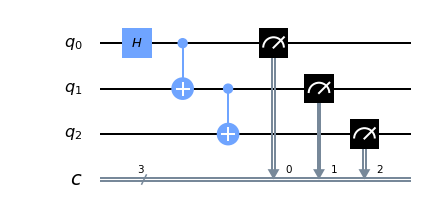

In [4]:
%matplotlib inline
circuit.draw(output='mpl')

In [5]:
simulator = Aer.get_backend('qasm_simulator')
sim_result = execute(circuit, backend = simulator, shots=1024).result()

In [6]:
from qiskit.visualization import plot_histogram

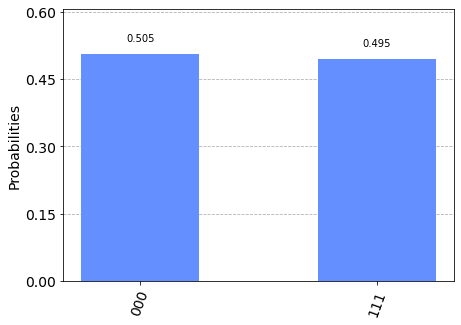

In [7]:
#Perfect quantum computer should
plot_histogram(sim_result.get_counts(circuit))

In [9]:
#real qc
IBMQ.load_account()
provider = IBMQ.get_provider('ibm-q')

ibmqfactory.load_account:WARNING:2020-10-02 19:35:59,308: Credentials are already in use. The existing account in the session will be replaced.


In [10]:
device = provider.get_backend('ibmqx2')

In [11]:
job = execute(circuit, backend= device, shots=1024)
print(job.job_id())
from qiskit.tools.monitor import job_monitor
job_monitor(job)

5f77e3dd4589620013288d36
Job Status: job has successfully run


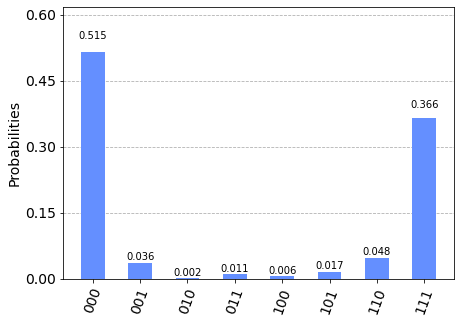

In [12]:
device_result = job.result()
plot_histogram(device_result.get_counts(circuit))

In [13]:
#
from qiskit.ignis.mitigation.measurement import (complete_meas_cal, CompleteMeasFitter)

In [16]:
cal_circuits, state_labels = complete_meas_cal(qr = circuit.qregs[0], circlabel = 'measerrormitigationcal')

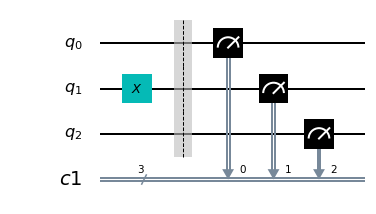

In [18]:
cal_circuits[2].draw(output = 'mpl')

In [19]:
len(cal_circuit)

8

In [20]:
cal_job = execute(cal_circuits,
                  backend = device,
                  shots = 1024,
                  optimization_level = 0
                 )
print(cal_job.job_id())
job_monitor(cal_job)

5f77e61760fc0e001a0cfff3
Job Status: job has successfully run


In [21]:
cal_results = cal_job.result()

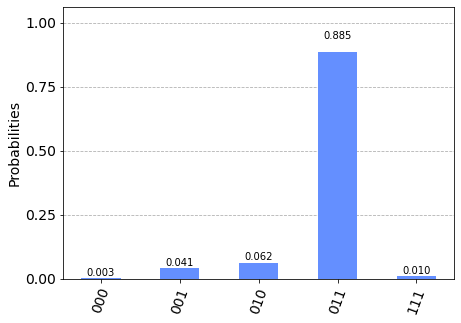

In [22]:
plot_histogram(
cal_results.get_counts(cal_circuits[3])
)

In [23]:
meas_fitter = CompleteMeasFitter(cal_results, state_labels)

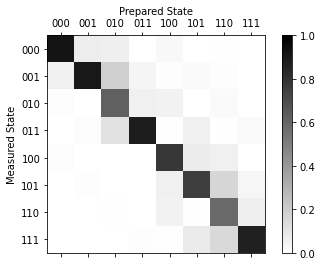

In [24]:
meas_fitter.plot_calibration()

In [25]:
#filter object
meas_filter = meas_fitter.filter

In [26]:
mitigated_result = meas_filter.apply(device_result)

In [27]:
device_counts = device_result.get_counts(circuit)

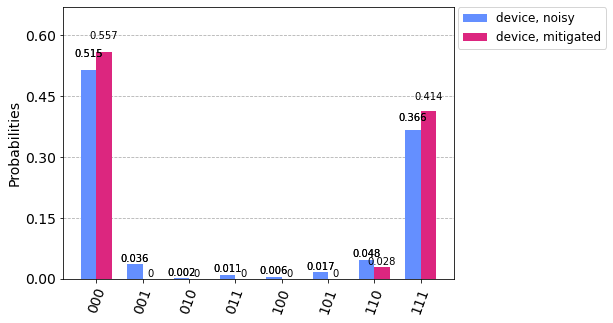

In [28]:
mitigated_counts = mitigated_result.get_counts(circuit)
plot_histogram([device_counts, mitigated_counts], legend=['device, noisy', 'device, mitigated'])

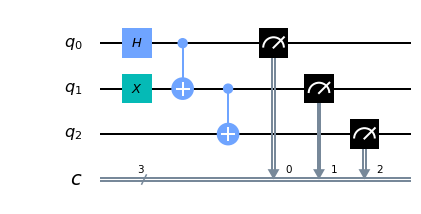

In [30]:
#Circuit2 
circuit2 = QuantumCircuit(3,3)
circuit2.x(1)
circuit2.h(0)
circuit2.cx(0,1)
circuit2.cx(1,2)
circuit2.measure([0,1,2], [0,1,2])
circuit2.draw(output='mpl')

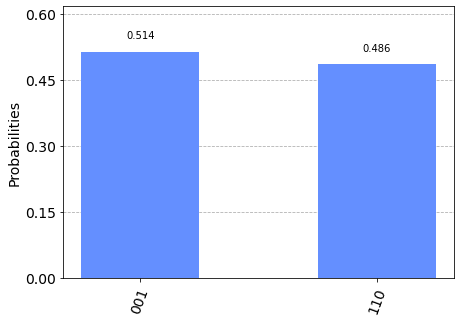

In [31]:
plot_histogram(
    execute(circuit2, backend=simulator, shots=1024).result().get_counts(circuit2)
)

In [32]:
device_counts_2 = execute(circuit2, backend=device, shots=1024).result().get_counts(circuit2)

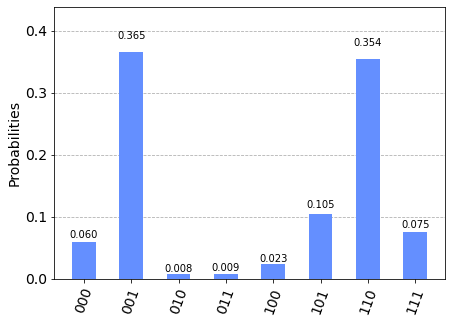

In [33]:
plot_histogram(device_counts_2)

In [34]:
device_mitigated_counts_2 = meas_filter.apply(device_counts_2)

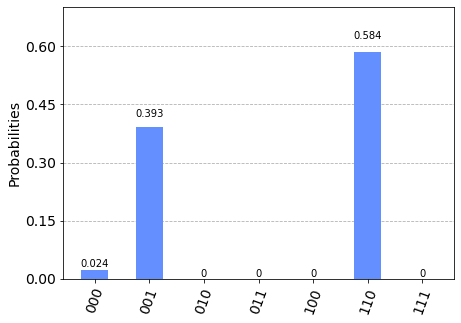

In [35]:
plot_histogram(device_mitigated_counts_2)